# Lasso regression with block updating

Sometimes, it is very useful to update a set of parameters together. For example, variables that are highly correlated are often good to update together. In PyMC 3 block updating is simple, as example will demonstrate.

Here we have a LASSO regression model where the two coefficients are strongly correlated. Normally, we would define the coefficient parameters as a single random variable, but here we define them separately to show how to do block updates.

First we generate some fake data.

In [1]:
%matplotlib inline

import warnings

import arviz as az
import numpy as np

from matplotlib.pylab import *
from pymc3 import *

d = np.random.normal(size=(3, 30))
d1 = d[0] + 4
d2 = d[1] + 4
yd = 0.2 * d1 + 0.3 * d2 + d[2]

In [2]:
warnings.filterwarnings("ignore")

Then define the random variables.

In [3]:
lam = 3

with Model() as model:
    s = Exponential("s", 1)
    tau = Uniform("tau", 0, 1000)
    b = lam * tau
    m1 = Laplace("m1", 0, b)
    m2 = Laplace("m2", 0, b)

    p = d1 * m1 + d2 * m2

    y = Normal("y", mu=p, sigma=s, observed=yd)

For most samplers, including Metropolis and HamiltonianMC, simply pass a list of variables to sample as a block. This works with both scalar and array parameters. 

In [4]:
with model:
    start = find_MAP()

    step1 = Metropolis([m1, m2])

    step2 = Slice([s, tau])

    trace = sample(10000, [step1, step2], start=start)

/Users/CloudChaoszero/opt/anaconda3/envs/pymc3-dev/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [m2]
>>Metropolis: [m1]
>CompoundStep
>>Slice: [tau]
>>Slice: [s]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 39 seconds.
The number of effective samples is smaller than 10% for some parameters.


/Users/CloudChaoszero/opt/anaconda3/envs/pymc3-dev/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


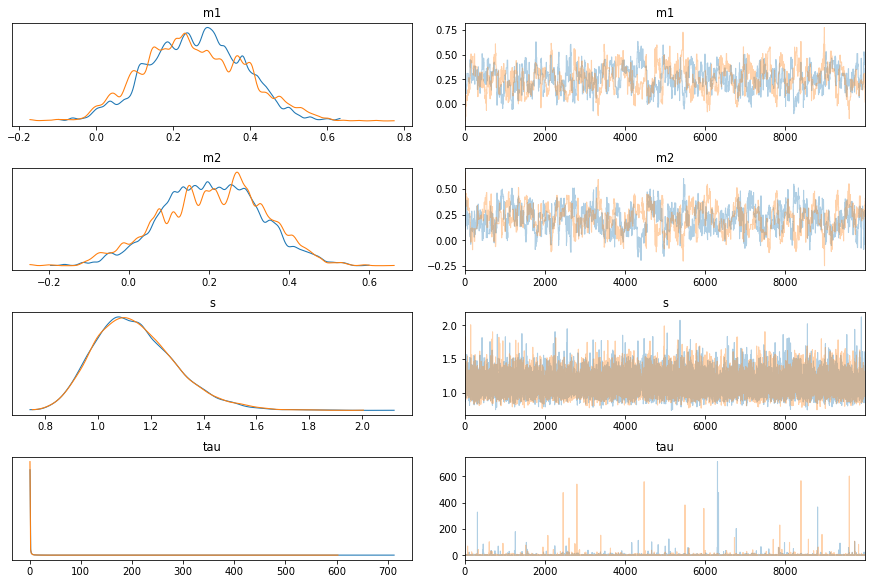

In [5]:
az.plot_trace(trace);

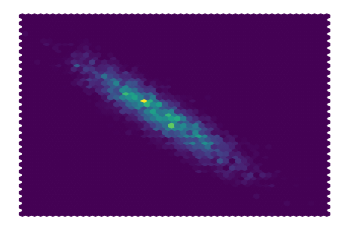

In [6]:
hexbin(trace[m1], trace[m2], gridsize=50)
axis("off");

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Jan 17 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

arviz     : 0.10.0
matplotlib: 3.3.3
re        : 2.2.1
sys       : 3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
pymc3     : 3.10.0
logging   : 0.5.1.2
platform  : 1.0.8
numpy     : 1.19.2

Watermark: 2.1.0

